# 7A SQL Grouping Exercise

## Aggregate data created from a query in SQL

In [ ]:
#pays to run code repeatedly
#neve want to introduce an error without resolving the first error
#may run the import more than once its fine

In [80]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [81]:
import sqlite3

In [82]:
## could add alias to SUM(chargeTimeHrs) so like SUM(chargeTimeHrs) as TimeCharged and then down below could do df.TimeCharged
group_query = "SELECT weekday, SUM(chargeTimeHrs) as TimeCharged FROM EVCharging GROUP by weekday"

In [83]:
# we are connecting to the file path for my database
#python way of double clicking that database file
connection = sqlite3.connect(r'/Users/Toki3Duckie/code/SavvyCoders/Activities/week7_sql.db')

#my error here was I forgot to use r since macs do not truly have "drive"ArithmeticError
#also \S usually means an escape function, that is why forward slashes are required for paths

In [84]:
#first create a variable for your sql query code
#before setup path connection to database
#next create dataframe
df = pd.read_sql_query(group_query, connection)

#I would like you to run this query on this dataframe

In [85]:
df

,weekday,TimeCharged
0,Fri,1685.67
1,Mon,1785.85
2,Sat,142.48
3,Sun,50.39
4,Thu,2050.19
5,Tue,1838.29
6,Wed,2094.42


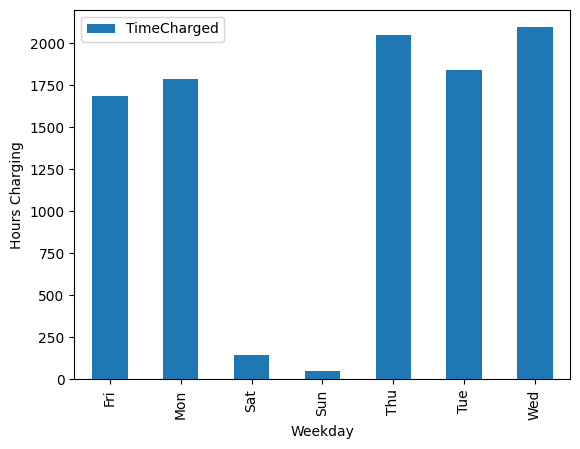

In [86]:
df.plot(x='weekday', y= 'TimeCharged', kind = 'bar')
plt.xlabel("Weekday")
plt.ylabel("Hours Charging")
plt.show()

In [ ]:
##another import method
#from matplotlib import pyplot

In [87]:
import datetime

In [89]:
## another method to order days of week
cats = ["Mon", "Tues", "Wed","Thu", "Fri", "Sat", "Sun"]
df.weekday = pd.Categorical(df.weekday, categories=cats, ordered = True)
df =df.sort_values(by="weekday")
df


#I want to esstablish a new category, it is from the values in this column, it should popoluate based on this order, and it should be ordered as stated

,weekday,TimeCharged
1,Mon,1785.85
6,Wed,2094.42
4,Thu,2050.19
0,Fri,1685.67
2,Sat,142.48
3,Sun,50.39
5,NaN,1838.29


TypeError: 'value' must be an instance of str or bytes, not a float

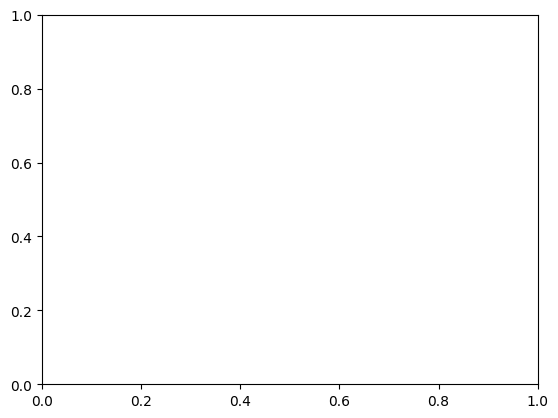

In [90]:
#another method
bars = plt.bar(
    df.weekday, 
    df.TimeCharged)

plt.xlabel("Weekday")
plt.ylabel("Hours Charging")
# newticks = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Friday']
# plt.xticks(ticks= newticks)

plt.title("Hours Spent Charging per day")
plt.savefig("lab_ev_charge.png", dpi=100)


In [55]:
#using order by clause to order the dates

group_query2 = """
SELECT weekday, SUM(chargeTimeHrs) as TotalCharge 
FROM EVCharging 
GROUP by weekday
ORDER by CASE weekday
    WHEN 'Mon' THEN 1
    WHEN 'Tue' THEN 2
    WHEN 'Wed' THEN 3
    WHEN 'Thu' THEN 4
    WHEN 'Fri' THEN 5
    WHEN 'Sat' THEN 6
    WHEN 'Sun' THEN 7
END
"""
df2 = pd.read_sql_query(group_query2, connection)

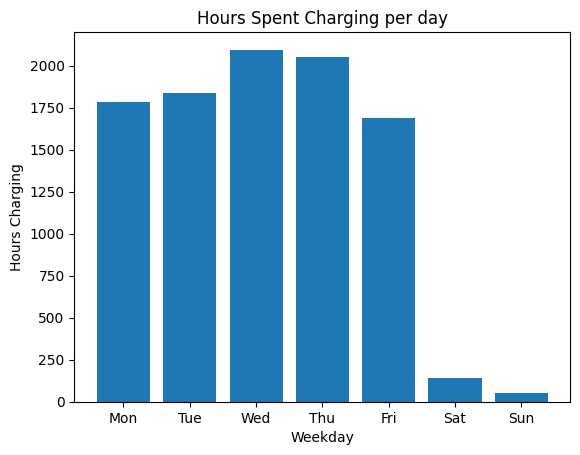

In [56]:
bar2 = plt.bar(
    df2.weekday, 
    df2.TotalCharge)

plt.xlabel("Weekday")
plt.ylabel("Hours Charging")
# newticks = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Friday']
# plt.xticks(ticks= newticks)

plt.title("Hours Spent Charging per day")
plt.savefig("lab_ev_charge2.png", dpi=100)

In [7]:
##this method requires I created a table, which I have not
#queryhours = pd.read_sql_query('select * from TimeChargingbyWeekday',con)
#queryhours

In [ ]:
#sql = "SELECT chargeTimeHrs,  Count(weekday) as Count, weekday FROM EVChargingGROUP by weekday ORDER by weekday ASC,chargeTimeHrs ASC;"